Run in codeastro conda environment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from astropy.time import Time
from more_itertools import consecutive_groups


In [2]:
# from tess_stars2px import TESS_Spacecraft_Pointing_Data
# sector = 14
# camera = 1
# ccd = 1
# col = 0
# row = 0 
# scinfo = TESS_Spacecraft_Pointing_Data(14)
# ra, dec = scinfo.fpgObjs[0].pix2radec_nocheck_single(camera - 1, ccd - 1, [col-45.0, row-1.0])

# Also! TESSpoint reference code:

# from tess_stars2px import tess_stars2px_function_entry as tess_stars2px
# ra,dec = 226.337147,36.786975
# sectors = tess_stars2px(8675309, ra, dec)[3]
# ^Note: The 867 number is any integer (technically a TIC ID but the code does not use it). You can provide an ra/dec and it should give you a list of sectors but also cameras/ccds if you are interested

# Output:
# return outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, \


In [3]:
from tess_stars2px import TESS_Spacecraft_Pointing_Data
from tess_stars2px import tess_stars2px_function_entry as tess_stars2px

In [4]:
# Read csvs
df = pd.read_csv('./target_df_longform.csv')
tdf = pd.read_csv('./target_df_shortform.csv')
df = df.drop(columns=df.columns[0])
tdf = tdf.drop(columns=tdf.columns[0])

# also fix the sec columns to that it isn't a string for some reason
from ast import literal_eval    
tdf["sec"] = tdf["sec"].apply(lambda x: literal_eval(x))

In [5]:
# ingest positions catalog
cat = pd.read_csv('CTLv8 (current).csv')
cat.rename(columns={'Right_Ascension':'ra', 'Declination':'dec', "TESSmag":'Tmag', 'Ecliptic_Longitude':'ec_long', 'Ecliptic_Latitude':'ec_lat', 'TIC_ID':'TIC'}, inplace=True)
cat[:5]


,ra,dec,Tmag,ec_long,ec_lat,TIC,Unnamed: 6
0,220.232448,-26.428675,6.91390,225.990733,-10.269982,42969,NaN
1,221.501740,-25.444850,6.52400,226.788813,-8.984815,82063,NaN
2,221.499632,-25.443643,4.83310,226.786607,-8.984237,82066,NaN
3,219.920773,-26.723852,6.52330,225.814106,-10.636939,34920,NaN
4,220.806357,-24.997792,5.70412,226.044917,-8.749483,58487,NaN


In [18]:
# len(np.unique(df.TIC))
# tdf

# Spherical Coord Code

In [4]:
out = np.meshgrid(th, phi)
np.shape(out[0])
Th, Phi = out[0], out[1]
Th

NameError: name 'th' is not defined

In [37]:
Th

2

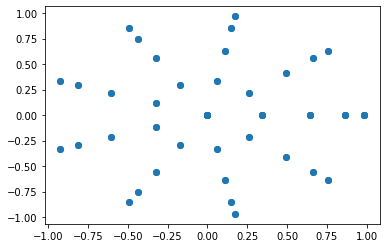

In [39]:
# generate uniform distr of points?
n = 10
r = np.ones(n)
th = np.linspace(0, np.pi, n)
phi = np.linspace(0, 2*np.pi, n)

out = np.meshgrid(th, phi)
Th, Phi = out[0], out[1]

x = np.sin(Th) * np.cos(Phi)
y = np.sin(Th) * np.sin(Phi)
# z = r * cos(th)


plt.scatter(x, y)


In [5]:
# generate uniform distr of points?
n = 5000
r = 1
# generateRandom = True
# generateFixed = True

def generateRandom(n, r=1):
    print("Generating randomly %d points on a sphere centered at the origin" % (n))
    theta = np.random.uniform(0.0,2*np.pi,n)
    z = np.random.uniform(-1.0,1.0,n)
    for i in range (0,n):
        zp = z[i]
        xp = np.sqrt(r*r - zp*zp)* np.cos(theta[i])
        yp = np.sqrt(r*r - zp*zp)* np.sin(theta[i])
    return xp, yp, zp

def generateFixed(n, r=1):
    # print("Generating fixed %d points on a sphere centered at the origin" % (n))
    alpha = 4.0*np.pi*r*r/n
    d = np.sqrt(alpha)
    m_nu = int(np.round(np.pi/d))
    d_nu = np.pi/m_nu
    d_phi = alpha/d_nu

    z = np.ones(n)

    for m in range (0,m_nu):
        nu = np.pi*(m+0.5)/m_nu
        m_phi = int(np.round(2*np.pi*np.sin(nu)/d_phi))
        for n in range (0,m_phi):
            phi = 2*np.pi*n/m_phi
            xp = r*np.sin(nu)*np.cos(phi)
            yp = r*np.sin(nu)*np.sin(phi)
            zp = r*np.cos(nu)
    return xp, yp, zp

xp, yp, zp = generateFixed(500)

In [11]:
np.ones(3)

array([1., 1., 1.])

In [10]:
n = 50
alpha = 4.0*np.pi*r*r/n
d = np.sqrt(alpha)
m_nu = int(np.round(np.pi/d))
d_nu = np.pi/m_nu
d_phi = alpha/d_nu
count = 0

m_nu
# for m in range (0,m_nu):
#     nu = np.pi*(m+0.5)/m_nu
#     m_phi = int(np.round(2*np.pi*np.sin(nu)/d_phi))
#     for n in range (0,m_phi):
#         phi = 2*np.pi*n/m_phi
#         xp = r*np.sin(nu)*np.cos(phi)
#         yp = r*np.sin(nu)*np.sin(phi)
#         zp = r*np.cos(nu)
#         count = count +1

6

# Scheduling Code

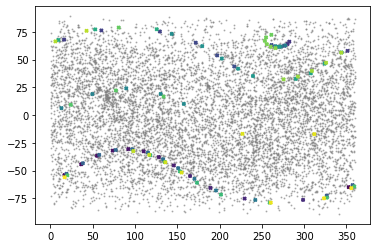

In [19]:
# for a given period, observed in one sector per mission, how many orbits do you catch?
per = 50  # in days
sectors = [1, 13]

scinfo = TESS_Spacecraft_Pointing_Data(1)
# ra, dec = scinfo.fpgObjs[0].pix2radec_nocheck_single(camera - 1, ccd - 1, [col-45.0, row-1.0])
# scinfo.fpgObjs[0]
scinfo.midtimes

plt.scatter(cat.ra, cat.dec, s=1, alpha=.5, color='grey')
plt.scatter(TESS_Spacecraft_Pointing_Data.ras, TESS_Spacecraft_Pointing_Data.decs, s=10, c=TESS_Spacecraft_Pointing_Data.midtimes, marker='X')



In [23]:
# Note: Midtimes really do seem to be the MIDDLE of the tess sector, so inclusive times for it will be +/- 13.5 days
# goes up to sector 96, which is the conclusion of Year 7 observing (mix of north/south + some ecliptic)
midtimes = TESS_Spacecraft_Pointing_Data.midtimes
midtimes_fake = np.arange(len(midtimes)) * np.mean((midtimes[1:] - midtimes[:-1])) + midtimes[0]
sectors_all = TESS_Spacecraft_Pointing_Data.sectors
print(sectors_all[-10:])
print(midtimes[-10:])

[87 88 89 90 91 92 93 94 95 96]
[2460676.  2460703.5 2460732.  2460760.5 2460788.5 2460816.  2460842.5
 2460868.5 2460894.5 2460920.5]


In [24]:
ra = cat.ra[0]
dec = cat.dec[0]

# run one
outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, outColPix, outRowPix, scinfo = \
    tess_stars2px(1111, ra, dec, scInfo=TESS_Spacecraft_Pointing_Data())

#run several!
j = 1
k = 10
arr = [1,60,700,400]
outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, outColPix, outRowPix, scinfo = \
    tess_stars2px(cat.TIC[arr], cat.ra[arr], cat.dec[arr], scInfo=TESS_Spacecraft_Pointing_Data())

# scinfo
scinfo.sectors
outSec
outID

array([   82063,    82063,    82063,    82063, 40785206,  8462730,
        8462730,  8462730,  8462730,  4612575,  4612575,  4612575])

In [9]:
# testing
t = Time(midtimes[2], format='jd')
t.format = 'iso'
t.value

period = 147.6
tc_phase = .15
start_time=missionStart; stop_time=missionStop

print(missionStart, missionStop)

num = np.ceil((stop_time - start_time) / period)
np.arange(start_time + tc_phase*period, stop_time, period)
# transit_times = np.arange(np.ceil(stop_time/period))
# transit_times = (transit_times + tc_phase) * period
# print(transit_times - missionStart)


NameError: name 'missionStart' is not defined

In [126]:
# get mission parameters
# Note: Midtimes really do seem to be the MIDDLE of the tess sector, so inclusive times for it will be +/- 13.5 days
midtimes = TESS_Spacecraft_Pointing_Data.midtimes
sec_cadence = np.mean(midtimes[1:] - midtimes[:-1])
sectors_all = TESS_Spacecraft_Pointing_Data.sectors
missionStart = midtimes[0] - 13.5
missionStop = midtimes[-1] + 13.5

# functions
def max_consecutive_sequence(arr):
    return max([len(list(i)) for i in consecutive_groups(arr)])

def calc_transit_times_phase(period, tc_phase, dur=2, start_time=missionStart, stop_time=missionStop):
    """period - days
    tc_phase - the fractional phase that the transit occurs at
    duration - duration in hours
    """
    transit_times = np.arange(start_time + tc_phase*period, stop_time, period)
    return transit_times

def calc_transit_times_tc(period, tc, dur=2, start_time=missionStart, stop_time=missionStop):
    """period - days
    tc - one time that the transit occurs at (does not need to be the first)
    duration - duration in hours
    """
    # Calculate the first occurrence of the event time after the start time
    first_occurrence = start_time + ((tc - start_time) % period)
    transit_times = np.arange(first_occurrence, stop_time + 1, period)
    return transit_times

# def generate_event_times(period, event_time, start_time, stop_time):
#     # Calculate the first occurrence of the event time after the start time
#     first_occurrence = start_time + ((tc - start_time) % period)
    
#     # Generate subsequent event times using arange
#     transit_times = np.arange(first_occurrence, stop_time + 1, period)
    
#     return transit_times

def check_observability(transit_times, sector_times, verbose=False, dur=2):
    """NOTE: Add in the duration as padding for when transits occur close to the edge of a sector."""
    dt = transit_times[:,None] - sector_times[None,:]
    obs_bool = (-13.5 < dt) & (dt < 13.5)
    trans_obs = np.sum(obs_bool, axis=1).astype(bool)
    sec_obs = np.sum(obs_bool, axis=0).astype(bool)

    # Just kidding, this part isn't true when a single sector contains more than one transit
    # # just check that both have the same number of "true" events
    if verbose and np.sum(trans_obs) != np.sum(sec_obs):
        # print('Something is wrong with observability calculation.')
        print('Period solved. Multiple transits in one sector observed.')
    return np.array(trans_obs), np.array(sec_obs)

def check_observability_OLD(transit_times, sector_times, verbose=False, dur=2):
    """NOTE: Add in the duration as padding for when transits occur close to the edge of a sector."""
    trans_obs = [any(n - 13.5 <= transit_time < n + 13.5 for n in sector_times) for transit_time in transit_times]
    sec_obs = [any(n - 13.5 <= sector_time < n + 13.5 for n in transit_times) for sector_time in sector_times]

    # Just kidding, this part isn't true when a single sector contains more than one transit
    # # just check that both have the same number of "true" events
    if verbose and np.sum(trans_obs) != np.sum(sec_obs):
        # print('Something is wrong with observability calculation.')
        print('Period solved. Multiple transits in one sector observed.')
    return np.array(trans_obs), np.array(sec_obs)

def find_all_aliases(transit_times, sectors, trans_obs, sec_obs, min_period=13):
    if np.sum(trans_obs) == 1:
        # print("Mono-transit")
        return [], []
    elif np.sum(trans_obs) == 0:
        # print("No transits detected")
        return [], []

    # longest baseline of consecutive sectors
    baseline = max_consecutive_sequence(sectors) * sec_cadence / 2

    # the maximum possible period is the difference between the two most closely spaced observed transits
    data = transit_times[trans_obs]
    max_alias = np.min(data[1:] - data[:-1])
    min_alias = max(min_period, baseline) 

    # in the future, I may add something to remove aliases that are needlessly close to each other, but we'll see if it's necessary
    min_n = np.floor(max_alias / min_alias)
    if min_n == 0:
        min_n = 1
    n_a = np.arange(1, min_n+1)
    aliases = max_alias / n_a
    return n_a, aliases

In [184]:
def check_event_within_period(period, event_time, secondary_times):
    """Returns True if the period would result in a transit taking place during the sector specified by that secondary_time."""
    result = [False] * len(secondary_times)  # Initialize result array with False values
    
    for i, secondary_time in enumerate(secondary_times):
        time_diff = (secondary_time - event_time) % period
        if time_diff <= 13.5 or time_diff >= period - 13.5:
            result[i] = True  # Update the value in the result array
        
    return result

def rule_out_aliases(periods, event_time, secondary_times):
    """For a list of alias periods, returns True if that period would result in a transit taking place during ANY sector specified by the secondary_times.
    
    Inputs:
        periods - a float or list of possible periods
        event_time - a time at which a transit was observed
        secondary_times - the midpoints of sectors in which transits were NOT observed
    
    Returns: arr[bool] where True means that that alias can be ruled out.
    """
    if isinstance(periods, np.ndarray):
        periods = periods.tolist()
    if not isinstance(periods, list):
        periods = [periods]  # Convert to list if a single value is provided
    results = [False] * len(periods)  # Initialize result array with False values
    
    for i, period in enumerate(periods):
        for secondary_time in secondary_times:
            time_diff = (secondary_time - event_time) % period
            if time_diff < 13.5 or time_diff > period - 13.5:
                results[i] = True 
                break  # No need to continue checking for this period
    return np.array(results)

def analyze_aliases_and_flag(transit_times, sectors, trans_obs, sec_obs):
    """    
    0 - No transits observed
    1 - Mono-transit
    2 - Duo+ transit, but unresolve aliases remaining
    3 - Solved
    """
    # default values
    n_a, aliases, ruled_out = [], [], []
    flag = -1

    num_transits_observed = len(transit_times[trans_obs])
    sector_times = midtimes_fake[sectors-1]

    if np.sum(trans_obs) > np.sum(sec_obs):
        # if multiple transits were caught in a single sector, then the period is solved
        # print('Sovled!')
        flag = 3
    elif num_transits_observed == 0:
        # print("No transits captured")
        # plot_transits()
        flag = 0
    elif num_transits_observed == 1:
        # print("Mono-transit")
        # plot_transits()
        flag = 1
    else:
        first_observed_transit = transit_times[trans_obs][0]
        n_a, aliases = find_all_aliases(transit_times, sectors, trans_obs, sec_obs)
        # see what is ruled out by the empty sectors
        ruled_out = rule_out_aliases(aliases, first_observed_transit, sector_times[~sec_obs])
        # ruled_out = rule_out_aliases(aliases, transit_times[trans_obs][0], [2458530.256944, 2458540.256944])

        # print the status
        if len(aliases[~ruled_out]) > 1 :
            # print("Still ambiguous!")
            flag = 2
        elif len(aliases[~ruled_out]) == 1 :
            # print('Sovled!')
            flag = 3
        else:
            print("Something went wrong")
        # plot_aliases()
    
    return flag, n_a, aliases, ruled_out

# # Example usage:
# period = 50  # assuming the period is 24 hours
# event_time = 9.0  # time of the event
# secondary_times = [28.0, 100.0, 122.5]  # secondary times

# # ruled_out = check_event_within_period(period, event_time, secondary_times)
# ruled_out = rule_out_aliases(np.array([50,80,200]), event_time, secondary_times)
# print(ruled_out)


In [27]:
# When we do the big run
# for each star position in the catalog
# for each period from 20 to (upper limit? 2000?)
# for each time of conjuction, on a grid of times
#   calculate the completion (i.e. % of solved periods, % of monotransits, % of unresolved duo transits)

print(missionStop - missionStart)

2607.847221999895


In [131]:
# # make df with all sector info (commented out, takes a few minutes to run)
# # exploratory plot of how many times each point on the sky gets hit
# # inds = random.sample(range(len(cat)), 1000)
# inds = range(len(cat))
# ra_arr = cat.ra[inds].values
# dec_arr = cat.dec[inds].values
# tic_arr = cat.TIC[inds].values

# outID, outEclipLong, outEclipLat, outSec, _, _, _, _, scinfo = \
#     tess_stars2px(tic_arr, ra_arr, dec_arr, scInfo=TESS_Spacecraft_Pointing_Data())

# df = pd.DataFrame({'TIC':outID, 'sec':outSec, 'ec_long':outEclipLong, 'ec_lat':outEclipLat})
# df['num_s'] = df.groupby(['TIC'])['sec'].transform('count')

# # aggregate to have one line per star
# tdf = df.drop_duplicates(subset='TIC')
# s = df.groupby('TIC')['sec'].agg(lambda x: x.unique().tolist())
# tdf = tdf.merge(s, on='TIC')
# tdf = tdf.drop(columns=['sec_x']).rename(columns={'sec_y':'sec'})
# tdf[:5]

,TIC,ec_long,ec_lat,num_s,sec
0,42969,225.986851,-10.269982,3,"[38, 65, 91]"
1,82063,226.784931,-8.984814,4,"[11, 38, 65, 91]"
2,82066,226.782725,-8.984237,4,"[11, 38, 65, 91]"
3,34920,225.810224,-10.636939,3,"[38, 65, 91]"
4,58487,226.041035,-8.749482,3,"[38, 65, 91]"


In [280]:
# # save the df and tdf
# df.to_csv('./target_df_longform.csv')
# tdf.to_csv('./target_df_shortform.csv')


In [61]:
print(len(df), len(new))

42764 8156


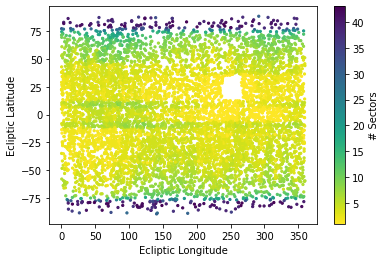

In [11]:
plt.scatter(tdf.ec_long, tdf.ec_lat, c=tdf.num_s, cmap='viridis_r', s=5)
plt.xlabel('Ecliptic Longitude')
plt.ylabel('Ecliptic Latitude')
# plt.title('TESS Sky Coverage')
plt.colorbar(label='# Sectors')
plt.show()

In [45]:
missionStart
2450000

2458326.152778

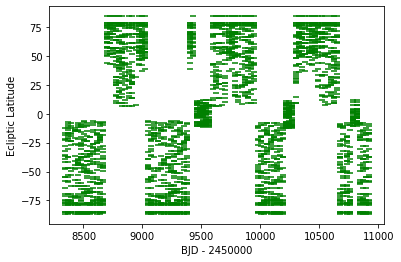

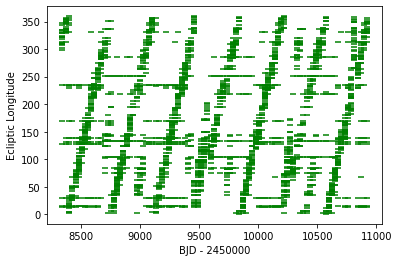

In [47]:
# plot to get a sense of observability
# tdf 
# sectors_all
# midtimes

for ind in np.arange(0, len(tdf), 15):
    secs = tdf.iloc[ind]['sec']
    # plt.scatter(midtimes[secs]-missionStart, ind*np.ones_like(secs), c='green', marker='s')
    plt.scatter(midtimes[np.array(secs)-1]-2450000, tdf.iloc[ind]['ec_lat']*np.ones_like(secs), c='green', marker='_')
plt.xlabel('BJD - 2450000')
plt.ylabel('Ecliptic Latitude')
plt.show()

for ind in np.arange(0, len(tdf), 15):
    secs = tdf.iloc[ind]['sec']
    # plt.scatter(midtimes[secs]-missionStart, ind*np.ones_like(secs), c='green', marker='s')
    plt.scatter(midtimes[np.array(secs)-1]-2450000, tdf.iloc[ind]['ec_long']*np.ones_like(secs), c='green', marker='_')
plt.xlabel('BJD - 2450000')
plt.ylabel('Ecliptic Longitude')
plt.show()

### Single Target Development

In [28]:
mini.iloc[k].TIC

cat[cat.TIC==mini.iloc[k].TIC].index.values[0]

NameError: name 'mini' is not defined

In [36]:
tdf

,TIC,ec_long,ec_lat,num_s,sec
0,42969,225.986851,-10.269982,3,"[38, 65, 91]"
1,82063,226.784931,-8.984814,4,"[11, 38, 65, 91]"
2,82066,226.782725,-8.984237,4,"[11, 38, 65, 91]"
3,34920,225.810224,-10.636939,3,"[38, 65, 91]"
4,58487,226.041035,-8.749482,3,"[38, 65, 91]"
...,...,...,...,...,...
8151,287157635,228.117931,-4.359140,1,[91]
8152,359676790,309.790197,81.581361,41,"[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 2..."
8153,371520835,135.184361,35.386791,2,"[48, 75]"
8154,440109725,24.685933,37.924316,3,"[17, 57, 84]"


[15 48 49 75 76]


Text(0.5, 0, 'JD')

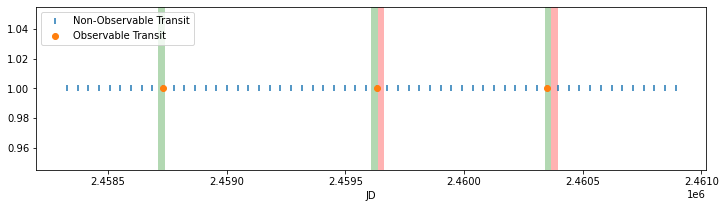

In [40]:
# define your planet
# ind = 2302
# period = 45
# tc = 0 + missionStart

k = 2309
ind = cat[cat.TIC==tdf.iloc[k].TIC].index.values[0]
# period = 20
period = 45
tc_phase = 0
tic = cat.TIC[ind]
ra = cat.ra[ind]
dec = cat.dec[ind]
sec = tdf.sec[k]
# ask tesspoint what sectors it is in
outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, outColPix, outRowPix, scinfo = \
    tess_stars2px(tic, ra, dec, scInfo=TESS_Spacecraft_Pointing_Data())

# sector_times = np.array([0, 1, 7, 8, 13, 14]) * 27
sector_times = midtimes[outSec-1]     # sectors are indexed from 1, midtimes from 0

print(outSec)
# print(sector_times)

# calculate transit times in the relevant window
transit_times = calc_transit_times_phase(period, tc_phase, dur=2)
trans_obs, sec_obs = check_observability(transit_times, sector_times)

# plot transits and sectors
fig, ax = plt.subplots(figsize=[12,3])
for ind in range(len(sector_times)):
    st = sector_times[ind]
    if ~sec_obs[ind]:
        plt.axvspan(st-13.5, st+13.5, alpha=0.3, color='red', linestyle='')
    else:
        plt.axvspan(st-13.5, st+13.5, alpha=0.3, color='green', linestyle='')
ax.scatter(transit_times, np.ones_like(transit_times), marker='|', label='Non-Observable Transit')
ax.scatter(transit_times[trans_obs], np.ones_like(transit_times[trans_obs]), label='Observable Transit')
ax.legend()
ax.set_xlabel('JD')



Still ambiguous!


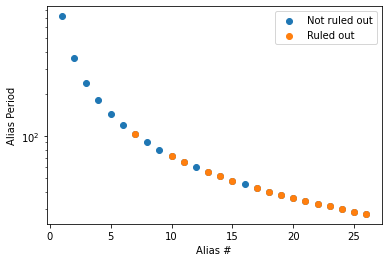

In [41]:
# find all the aliases
observed_transit = transit_times[trans_obs][0]
n_a, aliases = find_all_aliases(transit_times, sec, trans_obs, sec_obs)

if np.sum(trans_obs) > np.sum(sec_obs):
    print('Period solved. Two transits captured in single sector')
else:
    # see what is ruled out by the empty sectors
    ruled_out = rule_out_aliases(aliases, observed_transit, sector_times[~sec_obs])
    # ruled_out = rule_out_aliases(aliases, transit_times[trans_obs][0], [2458530.256944, 2458540.256944])

    # print the status
    if np.sum(aliases[~ruled_out]) > 1 :
        print("Still ambiguous!")
    elif np.sum(aliases[~ruled_out]) == 1 :
        print('Sovled!')
    else:
        print("Something went wrong")


    # see which aliases were ruled out
    plt.scatter(n_a, aliases, label='Not ruled out')
    plt.scatter(n_a[ruled_out], aliases[ruled_out], label='Ruled out')
    plt.yscale('log')
    plt.xlabel('Alias #')
    plt.ylabel('Alias Period')
    plt.legend()
    plt.show()




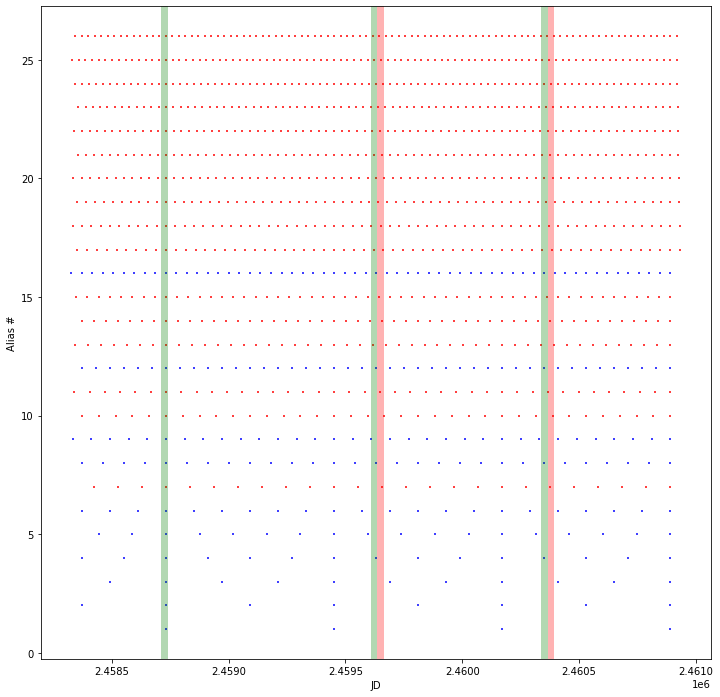

In [42]:
# plot all the alias transits in detail
plt.close('all')
plt.figure(figsize=[12,12])
for ind in range(len(aliases)):
    transits = calc_transit_times_tc(aliases[ind], observed_transit)
    if ruled_out[ind]:
        plt.scatter(transits, np.ones_like(transits)*n_a[ind], marker='|', s=3, c='red')
    else:
        plt.scatter(transits, np.ones_like(transits)*n_a[ind], marker='|', s=3, c='blue')

for ind in range(len(sector_times)):
    st = sector_times[ind]
    if ~sec_obs[ind]:
        plt.axvspan(st-13.5, st+13.5, alpha=0.3, color='red', linestyle='')
    else:
        plt.axvspan(st-13.5, st+13.5, alpha=0.3, color='green', linestyle='')

plt.xlabel('JD')
plt.ylabel('Alias #')    
plt.show()


/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_54914/449271651.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


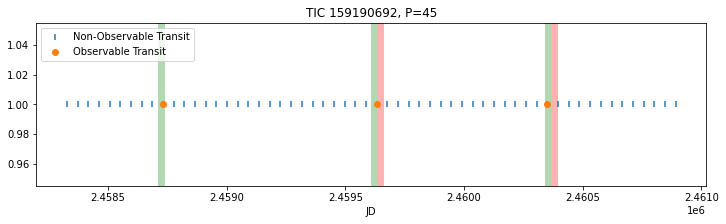

In [43]:
def plot_transits():
    plt.close('all')
    fig, ax = plt.subplots(figsize=[12,3])
    for ind in range(len(sector_times)):
        st = sector_times[ind]
        if ~sec_obs[ind]:
            plt.axvspan(st-13.5, st+13.5, alpha=0.3, color='red', linestyle='')
        else:
            plt.axvspan(st-13.5, st+13.5, alpha=0.3, color='green', linestyle='')
    ax.scatter(transit_times, np.ones_like(transit_times), marker='|', label='Non-Observable Transit')
    ax.scatter(transit_times[trans_obs], np.ones_like(transit_times[trans_obs]), label='Observable Transit')
    ax.legend()
    ax.set_xlabel('JD')
    ax.set_title('TIC ' + str(tic) + ', P=' + str(round(period, 2)))
    fig.show()

def plot_aliases():
    plt.close('all')
    plt.figure(figsize=[12,12])
    for ind in range(len(aliases)):
        transits = calc_transit_times_tc(aliases[ind], observed_transit)
        if ruled_out[ind]:
            plt.scatter(transits, np.ones_like(transits)*n_a[ind], marker='|', s=3, c='red')
        else:
            plt.scatter(transits, np.ones_like(transits)*n_a[ind], marker='|', s=3, c='blue')

    for ind in range(len(sector_times)):
        st = sector_times[ind]
        if ~sec_obs[ind]:
            plt.axvspan(st-13.5, st+13.5, alpha=0.3, color='red', linestyle='')
        else:
            plt.axvspan(st-13.5, st+13.5, alpha=0.3, color='green', linestyle='')

    plt.xlabel('JD')
    plt.ylabel('Alias #')  
    plt.title('TIC ' + str(tic) + ' P=' + str(round(period, 2)))  
    plt.show()

plot_transits()

## Making Observing Strategies

We will build an "extended extended mission" by assuming that futre sectors will reuse pointings from previous sectors. We build the mission by specifying the order that we want to repeat sectors, and then propagate their midtimes forward in time.

In [115]:
# midtimes = TESS_Spacecraft_Pointing_Data.midtimes
# sectors_all = TESS_Spacecraft_Pointing_Data.sectors
# plt.plot(midtimes[1:] - midtimes[:-1])
# plt.plot(sectors_all[-30:], midtimes[-30:], marker='.')

# average time between sector midtimes
sec_cadence = np.mean(midtimes[1:] - midtimes[:-1])

# Assume that the extended mission will reuse pointings from previous sectors
# repeat just year 1 and 2 as is
def_strat = sectors_all[:26]
ext_midtimes = midtimes[-1] + sec_cadence * (1 + np.arange(len(def_strat)))

# here is a strategy that observes the north first and the south second
flip_strat = np.hstack([sectors_all[13:26], sectors_all[:13]])
# flip_times = midtimes[-1] + sec_cadence * (1 + np.arange(len(flip_strat)))
# flip_times = ext_midtimes[flip_secs-1]

# # plot to check that the times line up properly
# plt.plot(sectors_all, midtimes, marker='.')
# plt.plot(new_secs + sectors_all[-1], ext_midtimes, marker='.')

# sector numbers and midtimes for the length of the extended mission
# this is invariant with strategy
sectors_ext = np.arange(1, len(sectors_all)+len(def_strat)+1)
midtimes_ext = np.hstack([midtimes, ext_midtimes])
sectors_all = TESS_Spacecraft_Pointing_Data.sectors
extStart = midtimes_ext[0] - 13.5
extStop = midtimes_ext[-1] + 13.5
len(midtimes_ext)

122

In [146]:
# define a function for the default strategy
# takes in the sectors for a target and puts out what the extende mission sectors would be

def extend_sectors(sectors, ext_strategy):
    """sectors - the sectors observed from 1-96
    ext_strategy - the sectors who's pointings will be repeated in the extended mission, in order of execution"""
    sec_set = set(sectors)
    full_strategy = np.hstack([np.arange(1,97), ext_strategy])
    full_secs = [i+1 for i, val in enumerate(full_strategy) if val in sec_set]

    return full_secs

def get_new_midtimes(full_secs, midtimes_ext):
    return(midtimes_ext[np.array(full_secs)-1])

def add_new_observations(period, tc, new_midtimes, aliases, ruled_out):
    # check if a transit will appear in the new sectors
    true_obs = check_event_within_period(period, tc, new_midtimes)

    # check if the aliases would appear in the new sectors
    newly_ruled_out = np.array([True] * len(aliases))
    for ind in range(len(aliases)):
        if ~ruled_out[ind]:
            # see if that alias would result in a transit in the new sector
            pred_obs = check_event_within_period(aliases[ind], tc, new_midtimes)
            # print(pred_obs)

            # if any of the observations do not match the prediction, then that alias can be ruled out
            newly_ruled_out[ind] = (true_obs!=pred_obs)

    return np.array(newly_ruled_out).astype(bool)
    
# example usage
s = np.asarray(tdf.loc[301, 'sec'])
full_secs = extend_sectors(s, def_strat)  # target sectors, strategy
new_midtimes = get_new_midtimes(full_secs, midtimes_ext)
new_midtimes[new_midtimes>missionStop]

array([2461165.00131577, 2461192.16812863])

In [ ]:
# for easy copying
# average time between sector midtimes
sec_cadence = np.mean(midtimes[1:] - midtimes[:-1])

# Assume that the extended mission will reuse pointings from previous sectors
# repeat just year 1 and 2 as is
def_strat = sectors_all[:26]
ext_midtimes = midtimes[-1] + sec_cadence * (1 + np.arange(len(def_strat)))

# here is a strategy that observes the north first and the south second
flip_strat = np.hstack([sectors_all[13:26], sectors_all[:13]])

# sector numbers and midtimes for the length of the extended mission
# this is invariant with strategy
sectors_ext = np.arange(1, len(sectors_all)+len(def_strat)+1)
midtimes_ext = np.hstack([midtimes, ext_midtimes])
sectors_all = TESS_Spacecraft_Pointing_Data.sectors
extStart = midtimes_ext[0] - 13.5
extStop = midtimes_ext[-1] + 13.5

# example usage
s = np.asarray(tdf.loc[301, 'sec'])
full_secs = extend_sectors(s, def_strat)  # target sectors, strategy
new_midtimes = get_new_midtimes(full_secs, midtimes_ext)
new_midtimes[new_midtimes>missionStop]

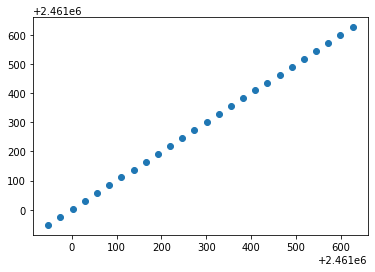

In [60]:
# print(new_midtimes)
# print(flip_times)
plt.scatter(new_midtimes, flip_times)

In [142]:
sec[sec<=26]

array([ 1, 13, 14, 26])

In [136]:
flip_times[sec[sec<=26]-1]

# plt.plot(new_midtimes)
# plt.plot(np.hstack([sec,sec[sec<=26]-1]))
# plt.plot(np.hstack([midtimes[sec],flip_times[sec[sec<=26]-1]]))

array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12, 13])

## Scaling up

# of Single Sector Targets:  787


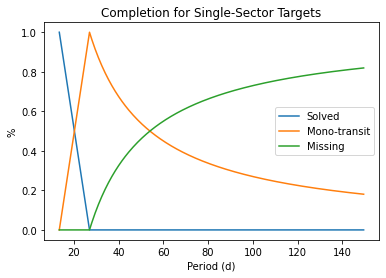

In [44]:
# completion rates for single sector targets are analytical
print("# of Single Sector Targets: ", len(tdf[tdf.num_s==1]))

def completion_for_single_sectors(periods):
    if isinstance(periods, (float, int)):
        periods = [periods]
    solved = [np.nan] * len(periods)
    mono = [np.nan] * len(periods)
    missing = [np.nan] * len(periods)
    
    for ind in range(len(periods)):
        p = periods[ind]
        if 13.5 <= p and p < 27:
            solved[ind] = (27-p)/27 * 2
            mono[ind] = (2*p-27)/27
            missing[ind] = 0
        elif p >= 27:
            solved[ind] = 0
            mono[ind] = 1 - (p-27)/p
            missing[ind] = (p-27)/p
        else:
            solved[ind] = np.nan
            mono[ind] = np.nan
            missing[ind] = np.nan          
            # print('Period too short')
            # return [np.nan, np.nan, np.nan]
    return np.array(solved), np.array(mono), np.array(missing)

# easy printing
if False:
    p = 26
    print("For P = [13,27)")
    print("Solved %", (27-p)/27 * 2)
    print("Mono %", (2*p-27)/27)
    print('')

    p = 27*2
    print("For P = [27,inf)")
    print("Missing %", (p-27)/p)
    print("Mono %", 1 - (p-27)/p)
    print('')

periods = np.arange(13.5, 150, .5)
solved, mono, missing = completion_for_single_sectors(periods)
ss_df = pd.DataFrame({'period':periods, 'solved':solved, 'mono':mono, 'missing':missing})

plt.plot(ss_df.period, ss_df.solved, label='Solved')
plt.plot(ss_df.period, ss_df.mono, label='Mono-transit')
plt.plot(ss_df.period, ss_df.missing, label='Missing')
plt.legend()
plt.xlabel('Period (d)')
plt.ylabel('%')
plt.title('Completion for Single-Sector Targets')
plt.show()


In [24]:
print(len(tdf[tdf.num_s==0]))
print(len(tdf[tdf.num_s==1]), len(ss_df))
print(len(tdf[tdf.num_s==2]))


0
787 273
1430


In [14]:
# sky plot of single sector stuff
# how are we defining "completion rate"?
completion_for_single_sectors(15)

(array([0.88888889]), array([0.11111111]), array([0]))

In [45]:
# play around with scaling up
np.random.seed(42)

# to do the big run, we can remove the single transit stars
tdf1 = tdf[tdf.num_s>1]

i2 = random.sample(range(len(tdf1)), 50)
mini = tdf1.iloc[i2]#.reset_index()
# tics = tdf1.iloc[i2]['TIC'].values

periods = 100*np.random.rand(4) + 10
tc_phases = np.random.rand(3)

print(periods)
mini[:5]

[ 47.45401188 105.07143064  83.19939418  69.86584842]


,TIC,ec_long,ec_lat,num_s,sec
5852,317479128,87.526021,-38.928275,3,"[6, 33, 87]"
2549,188874716,0.025610,37.977234,3,"[16, 56, 83]"
424,45421861,168.953547,-47.187419,6,"[9, 35, 36, 62, 63, 89]"
4401,265075778,129.215514,-17.277609,3,"[7, 34, 61]"
6198,323171159,255.018114,-71.803935,11,"[11, 12, 13, 27, 38, 39, 65, 66, 67, 93, 94]"


In [ ]:
# Maybe we do this as a datacube
# loc x per x tc
# then the value saved can be the flag/number of aliases?
# then make a plot of period vs. ec_lat and color code by % solved, alias, mono, and missing

## Run w/ Extended Strategies

In [138]:
# information for adding extended mission strategies
# Assume that the extended mission will reuse pointings from previous sectors

# average time between sector midtimes
sec_cadence = np.mean(midtimes[1:] - midtimes[:-1])

# Strategy that repeats just year 1 and 2 as is
def_strat = sectors_all[:26]
ext_midtimes = midtimes[-1] + sec_cadence * (1 + np.arange(len(def_strat)))

# Strategy that observes the north first and the south second
flip_strat = np.hstack([sectors_all[13:26], sectors_all[:13]])

# sector numbers and midtimes for the length of the extended mission
# this is invariant with strategy
sectors_ext = np.arange(1, len(sectors_all)+len(def_strat)+1)
midtimes_ext = np.hstack([midtimes, ext_midtimes])
sectors_all = TESS_Spacecraft_Pointing_Data.sectors
extStart = midtimes_ext[0] - 13.5   # same as missionStart
extStop = midtimes_ext[-1] + 13.5

# # example usage
# s = np.asarray(tdf.loc[301, 'sec'])
# full_secs = extend_sectors(s, def_strat)  # target sectors, strategy
# new_midtimes = get_new_midtimes(full_secs, midtimes_ext)
# new_midtimes[new_midtimes>missionStop]

array([2461165.00131577, 2461192.16812863])

In [132]:
# develop a function to add new observations
# the function now lives up in the "Making Observing Strategies" section
tic = 00000
period = 67.3
tc_phase = .1

sec = np.array([1, 2, 27, 28, 33])
sector_times = midtimes[sec-1]

# calculate transit times in the relevant window
transit_times = calc_transit_times_phase(period, tc_phase, dur=2)
trans_obs, sec_obs = check_observability(transit_times, sector_times)

# find all the aliases and flag
num_transits_observed = len(transit_times[trans_obs])
flag, n_a, aliases, ruled_out = analyze_aliases_and_flag(transit_times, sec, trans_obs, sec_obs)
if len(aliases) > 0:
    num_aliases = len(aliases[ruled_out])
else:
    num_aliases = 0

# plot_transits();

# add observations
# new_midtimes = [2460897+58, 2460897+58+27]
# for default strategy
full_secs0 = extend_sectors(sec, def_strat)  # target sectors, strategy
full_midtimes0 = get_new_midtimes(full_secs0, midtimes_ext)
new_midtimes0 = full_midtimes0[full_midtimes0>missionStop]

# for flipped strategy
full_secs1 = extend_sectors(sec, flip_strat)  # target sectors, strategy
full_midtimes1 = get_new_midtimes(full_secs1, midtimes_ext)
new_midtimes1 = full_midtimes1[full_midtimes1>missionStop]

print(len(aliases))
print(aliases[~ruled_out])
# transit_times[trans_obs][:-1] - transit_times[trans_obs][1:]

newly_ruled_out0 = add_new_observations(period, transit_times[0], new_midtimes0, aliases, ruled_out)
newly_ruled_out1 = add_new_observations(period, transit_times[0], new_midtimes1, aliases, ruled_out)

print(newly_ruled_out0)
print(aliases[~newly_ruled_out0])
# aliases[ruled_out]
# print(ruled_out)
# print(aliases)
# print(aliases[ruled_out])

if len(aliases[~newly_ruled_out0]) < len(aliases[~ruled_out]):
    print('Improvement!')

print(newly_ruled_out1)
print(aliases[~newly_ruled_out1])
if len(aliases[~newly_ruled_out1]) < len(aliases[~ruled_out]):
    print('Improvement!')



4
[134.6  67.3]
[ True False  True  True]
[67.3]
Improvement!
[False False  True  True]
[134.6  67.3]


**6/12/24 START HERE**

In [147]:
# version with extended strategies
periods = np.arange(20,50,3.23)
tc_phases = np.arange(0,1,.1)

rows_list = []

for k in range(len(mini)):
    for j in range(len(periods)):
        for l in range(len(tc_phases)):
            period = periods[j]
            tc_phase = tc_phases[l]

            sec = np.array(mini.iloc[k]['sec'])
            sector_times = midtimes[sec-1]     # sectors are indexed from 1, midtimes from -

            # calculate transit times in the relevant window
            transit_times = calc_transit_times_phase(period, tc_phase, dur=2)
            trans_obs, sec_obs = check_observability(transit_times, sector_times)

            # find all the aliases and flag
            num_transits_observed = len(transit_times[trans_obs])
            flag, n_a, aliases, ruled_out = analyze_aliases_and_flag(transit_times, sec, trans_obs, sec_obs)
            if len(aliases) > 0:
                num_aliases = len(aliases[ruled_out])
            else:
                num_aliases = 0

            # if the flag is solved, skip and move on
            if flag == 3:
                asdfa
                
            else:

            # get midtimes for the default extended strategy
            # sorry this is messy
            full_secs0 = extend_sectors(sec, def_strat)  # target sectors, strategy
            full_midtimes0 = get_new_midtimes(full_secs0, midtimes_ext)
            new_midtimes0 = full_midtimes0[full_midtimes0>missionStop]
            # run the new observations
            newly_ruled_out0 = add_new_observations(period, transit_times[0], new_midtimes0, aliases, ruled_out)

            # for flipped strategy
            full_secs1 = extend_sectors(sec, flip_strat)  # target sectors, strategy
            full_midtimes1 = get_new_midtimes(full_secs1, midtimes_ext)
            new_midtimes1 = full_midtimes1[full_midtimes1>missionStop]
            # run the new observations
            newly_ruled_out1 = add_new_observations(period, transit_times[0], new_midtimes1, aliases, ruled_out)


            # save the row info
            # column_names = ['TIC', 'ec_long', 'ec_lat', 'period', 'tc_phase', 'num_aliases', 'na_def', na_flip', 'flag']
            row = [mini.iloc[k]['TIC'], 
                    mini.iloc[k]['ec_long'], mini.iloc[k]['ec_lat'], 
                    # mini.iloc[k]['num_s'], mini.iloc[k]['sec'], 
                    period, tc_phase, num_aliases,
                    aliases[~newly_ruled_out0], aliases[~newly_ruled_out1],
                    flag]
            
            rows_list.append(row)



TypeError: only integer scalar arrays can be converted to a scalar index

In [148]:
newly_ruled_out0

array([], dtype=bool)

## Run with just the main mission

In [227]:
# play around with scaling up
np.random.seed(42)
# np.random.seed(82)

# to do the big run, we can remove the single transit stars
tdf1 = tdf[tdf.num_s>1]

i2 = random.sample(range(len(tdf1)), 50)
mini = tdf1.iloc[i2]#.reset_index()
# tics = tdf1.iloc[i2]['TIC'].values

# periods = 100*np.random.rand(4) + 10
# tc_phases = np.random.rand(3)

# print(periods)
mini[:5]

[ 47.45401188 105.07143064  83.19939418  69.86584842]


,TIC,ec_long,ec_lat,num_s,sec
3585,231665881,301.489496,-39.419540,5,"[1, 27, 67, 94, 95]"
5316,356698350,173.100888,26.694692,2,"[22, 49]"
3965,211401599,312.542232,-18.684440,4,"[1, 28, 68, 95]"
5946,368890247,55.903573,56.070752,10,"[18, 24, 25, 52, 58, 59, 78, 79, 85, 86]"
2218,133253896,135.788227,-55.073231,6,"[7, 8, 34, 35, 61, 88]"


In [93]:
# [any(n - 13.5 <= transit_time < n + 13.5 for n in sector_times) for transit_time in transit_times]
# [any(n - 13.5 <= sector_time < n + 13.5 for n in transit_times) for sector_time in sector_times]

# 52 x 4
dt = transit_times[:,None] - sector_times[None,:]
obs_bool = (-13.5 < dt) & (dt < 13.5)
trans_obs = np.sum(obs_bool, axis=1).astype(bool)
sec_obs = np.sum(obs_bool, axis=0).astype(bool)

In [186]:
np.sum(trans_obs)
print(period)
# plot_transits()

# # checking midtimes overlap
# np.mean((midtimes[1:] - midtimes[:-1]) / 2)
# midtimes_fake = np.arange(len(midtimes)) * np.mean((midtimes[1:] - midtimes[:-1])) + midtimes[0]
# # plt.plot(midtimes)
# # plt.plot(midtimes_fake)

print(np.sum(trans_obs), np.sum(sec_obs))
first_observed_transit = transit_times[trans_obs][0]
n_a, aliases
baseline

find_all_aliases(transit_times, sec, trans_obs, sec_obs, min_period=13)
# rule_out_aliases(aliases, first_observed_transit, sector_times[~sec_obs])

print(aliases)


for i, period in enumerate(aliases):
    for secondary_time in sector_times[~sec_obs]:
        time_diff = (secondary_time - first_observed_transit) % period
        print(time_diff)
        
        if time_diff < 13.5 or time_diff > period - 13.5:
            print('True') 
        else:
            print('false')
        #     break  # No need to continue checking for this period
# return np.array(results)

# ruled_out
print(k, j, l)
# k, j, l = 6 9 0

49.60000000000002
3 3
[49.6]
23.399765976704657
false
49 37 9


In [187]:
periods = np.arange(20,50,.8)
tc_phases = np.arange(0,1,.1)

rows_list = []

for k in range(len(mini)):
    for j in range(len(periods)):
        for l in range(len(tc_phases)):
            period = periods[j]
            tc_phase = tc_phases[l]

            sec = np.array(mini.iloc[k]['sec'])
            sector_times = midtimes_fake[sec-1]     # sectors are indexed from 1, midtimes from -

            # calculate transit times in the relevant window
            transit_times = calc_transit_times_phase(period, tc_phase, dur=2)
            trans_obs, sec_obs = check_observability(transit_times, sector_times)

            # find all the aliases and flag
            num_transits_observed = len(transit_times[trans_obs])

            sectors = sec

            # find_all_aliases(transit_times, sec, trans_obs, sec_obs, min_period=13.5)

            flag, n_a, aliases, ruled_out = analyze_aliases_and_flag(transit_times, sec, trans_obs, sec_obs)

            # if flag == -1:
            #     break

    #     else:
    #         continue
    #     break
    # else:
    #     continue
    # break

            # if len(aliases) > 0:
            #     num_aliases = len(aliases[ruled_out])
            # else:
            #     num_aliases = 0

            # row = [mini.iloc[k]['TIC'], 
            #         mini.iloc[k]['ec_long'], mini.iloc[k]['ec_lat'], 
            #         # mini.iloc[k]['num_s'], mini.iloc[k]['sec'], 
            #         period, tc_phase, num_aliases, flag]
            
            # rows_list.append(row)
            

In [221]:
# non-plotting version
periods = np.arange(20,70,.8)
tc_phases = np.arange(0,1,.1)

rows_list = []

for k in range(len(mini)):
    for j in range(len(periods)):
        for l in range(len(tc_phases)):
            period = periods[j]
            tc_phase = tc_phases[l]

            sec = np.array(mini.iloc[k]['sec'])
            sector_times = midtimes_fake[sec-1]     # sectors are indexed from 1, midtimes from -
            # sector_times = midtimes[sec-1]     # sectors are indexed from 1, midtimes from -

            # calculate transit times in the relevant window
            transit_times = calc_transit_times_phase(period, tc_phase, dur=2)
            trans_obs, sec_obs = check_observability(transit_times, sector_times)

            # find all the aliases and flag
            num_transits_observed = len(transit_times[trans_obs])
            flag, n_a, aliases, ruled_out = analyze_aliases_and_flag(transit_times, sec, trans_obs, sec_obs)
            if len(aliases) > 0:
                num_aliases = len(aliases[ruled_out])
            else:
                num_aliases = 0

            # # find all the aliases
            # observed_transit = transit_times[trans_obs][0]
            # n_a, aliases = find_all_aliases(transit_times, sec, trans_obs, sec_obs)

            # # see what is ruled out by the empty sectors
            # ruled_out = rule_out_aliases(aliases, observed_transit, sector_times[~sec_obs])

            # save the row info
            # column_names = ['TIC', 'ec_long', 'ec_lat', 'num_s', 'sec', 'period', 'tc_phase', 'num_aliases', 'flag']
            # column_names = ['TIC', 'ec_long', 'ec_lat', 'period', 'tc_phase', 'num_aliases', 'flag']
            row = [mini.iloc[k]['TIC'], 
                    mini.iloc[k]['ec_long'], mini.iloc[k]['ec_lat'], 
                    # mini.iloc[k]['num_s'], mini.iloc[k]['sec'], 
                    period, tc_phase, num_aliases, flag]
            
            rows_list.append(row)



In [192]:
rows_list[0]

[305139306, 284.01134413848047, -29.09760314639781, 20.0, 0.0, 0, 3]

In [222]:
column_names = ['TIC', 'ec_long', 'ec_lat', 'period', 'tc_phase', 'num_aliases', 'flag']
rdf1 = pd.DataFrame(rows_list, columns=column_names)
# rdf[rdf.flag==-1]
rdf1[10000:10005]

,TIC,ec_long,ec_lat,period,tc_phase,num_aliases,flag
10000,412559619,264.199921,-28.67577,64.0,0.0,95,2
10001,412559619,264.199921,-28.67577,64.0,0.1,0,1
10002,412559619,264.199921,-28.67577,64.0,0.2,93,2
10003,412559619,264.199921,-28.67577,64.0,0.3,88,2
10004,412559619,264.199921,-28.67577,64.0,0.4,89,2


In [215]:
len(np.unique(rdf1.TIC))
# plot_transits()

50

In [ ]:
# Flags
# -1 - failure
# 0 - no transits captured
# 1 - mono trans
# 2 - duo w/ aliases remaining
# 3 - solved


**NOTE: NEED TO ADD BACK IN THE SINGLE SECTOR TARGETS**

In [223]:
# figure out some useful groupbys
def count_solved(x):
    return np.sum(x==3)/len(x)
def count_duo(x):
    return np.sum(x==2)/len(x)
def count_mono(x):
    return np.sum(x==1)/len(x)
def count_missed(x):
    return np.sum(x==0)/len(x)

temp1 = rdf1.groupby(['TIC', 'period'], as_index=False).agg({
                    # 'period': 'first',
                    'ec_long':'first', 
                    'ec_lat':'first', 
                    'num_aliases':'mean',
                    'flag':[count_solved, count_duo, count_mono, count_missed], })#.droplevel(level=1)
                        #  'd': lambda x: x.max() - x.min()})

# rename columns
# temp.columns.get_level_values(0)
temp1.columns = ['TIC', 'period', 'ec_long', 'ec_lat', 'num_aliases', 'count_solved', 'count_duo',
       'count_mono', 'count_missed']
# temp1

/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_79530/1031028615.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(temp.period, temp.ec_lat, c=np.log10(temp.flag.count_solved.values), s=3)


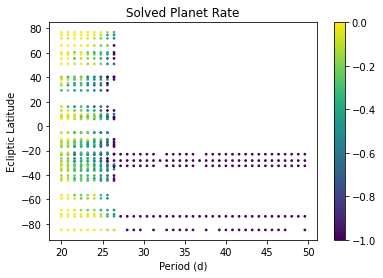

/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_79530/1031028615.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(temp.period, temp.ec_lat, c=np.log10(temp.flag.count_duo.values), s=3)


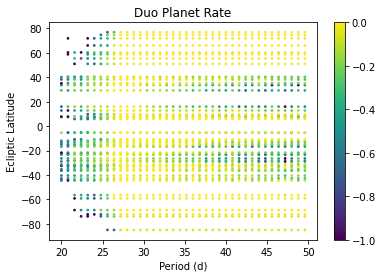

/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_79530/1031028615.py:17: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(temp.period, temp.ec_lat, c=np.log10(temp.flag.count_mono.values), s=3)


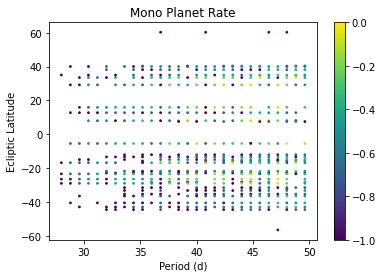

/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_79530/1031028615.py:24: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(temp.period, temp.ec_lat, c=np.log10(temp.flag.count_missed.values), s=3)


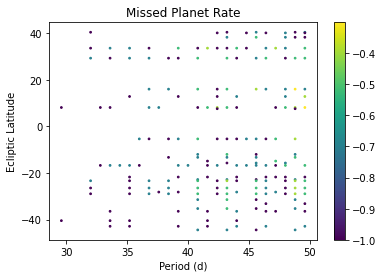

In [242]:
# plots
# temp.flag.values
# temp.ec_long.values
plt.scatter(temp.period, temp.ec_lat, c=np.log10(temp.flag.count_solved.values), s=3)
plt.colorbar()
plt.xlabel('Period (d)')
plt.ylabel('Ecliptic Latitude')
plt.title('Solved Planet Rate')
plt.show()

plt.scatter(temp.period, temp.ec_lat, c=np.log10(temp.flag.count_duo.values), s=3)
plt.colorbar()
plt.xlabel('Period (d)')
plt.ylabel('Ecliptic Latitude')
plt.title('Duo Planet Rate')
plt.show()

plt.scatter(temp.period, temp.ec_lat, c=np.log10(temp.flag.count_mono.values), s=3)
plt.colorbar()
plt.xlabel('Period (d)')
plt.ylabel('Ecliptic Latitude')
plt.title('Mono Planet Rate')
plt.show()

plt.scatter(temp.period, temp.ec_lat, c=np.log10(temp.flag.count_missed.values), s=3)
plt.colorbar()
plt.xlabel('Period (d)')
plt.ylabel('Ecliptic Latitude')
plt.title('Missed Planet Rate')
plt.show()

/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_79530/1292137192.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(temp1.period, temp1.ec_lat, c=np.log10(temp1.count_solved.values), s=3)


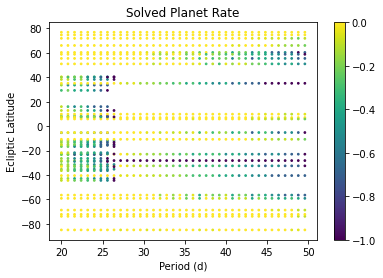

/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_79530/1292137192.py:11: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(temp1.period, temp1.ec_lat, c=np.log10(temp1.count_duo.values), s=3)


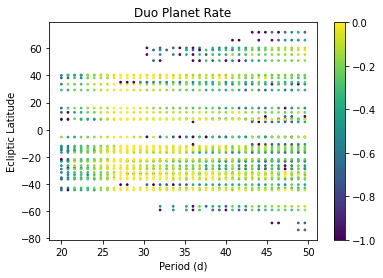

/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_79530/1292137192.py:18: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(temp1.period, temp1.ec_lat, c=np.log10(temp1.count_mono.values), s=3)


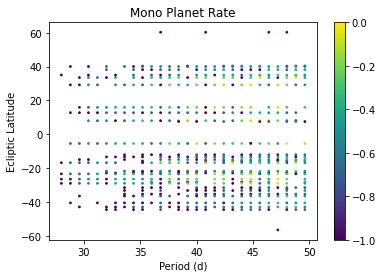

/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_79530/1292137192.py:25: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(temp1.period, temp1.ec_lat, c=np.log10(temp1.count_missed.values), s=3)


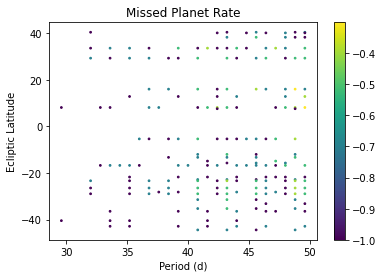

In [539]:
# plots for second run
# temp1.values
# temp1.ec_long.values
plt.scatter(temp1.period, temp1.ec_lat, c=np.log10(temp1.count_solved.values), s=3)
plt.colorbar()
plt.xlabel('Period (d)')
plt.ylabel('Ecliptic Latitude')
plt.title('Solved Planet Rate')
plt.show()

plt.scatter(temp1.period, temp1.ec_lat, c=np.log10(temp1.count_duo.values), s=3)
plt.colorbar()
plt.xlabel('Period (d)')
plt.ylabel('Ecliptic Latitude')
plt.title('Duo Planet Rate')
plt.show()

plt.scatter(temp1.period, temp1.ec_lat, c=np.log10(temp1.count_mono.values), s=3)
plt.colorbar()
plt.xlabel('Period (d)')
plt.ylabel('Ecliptic Latitude')
plt.title('Mono Planet Rate')
plt.show()

plt.scatter(temp1.period, temp1.ec_lat, c=np.log10(temp1.count_missed.values), s=3)
plt.colorbar()
plt.xlabel('Period (d)')
plt.ylabel('Ecliptic Latitude')
plt.title('Missed Planet Rate')
plt.show()

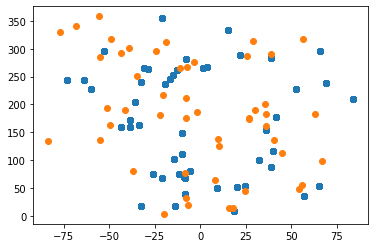

In [228]:
plt.scatter(temp1.ec_lat, temp1.ec_long)
plt.scatter(mini.ec_lat, mini.ec_long)

In [231]:
np.unique(temp1.ec_lat)

array([-73.32200429, -63.74970836, -60.11076014, -52.92962947,
       -43.49512081, -38.73739581, -38.42933462, -36.00920432,
       -33.54867473, -32.84462998, -32.62400728, -30.72968727,
       -28.67577016, -25.81285929, -21.3075192 , -21.12662595,
       -19.5419765 , -16.74228744, -14.93380039, -14.59405927,
       -13.93359364, -12.72185906, -11.76416689, -10.22491077,
        -9.84654465,  -9.04877047,  -8.61483869,  -8.39690355,
        -7.81490582,  -5.79292517,   1.70052899,   3.90002081,
         9.02067266,  15.13978481,  18.55439971,  20.07109841,
        21.87440558,  24.77610583,  31.96419054,  36.19509605,
        38.55929402,  38.60646029,  39.64143365,  41.66813714,
        52.409912  ,  56.9427898 ,  64.9771033 ,  65.79587347,
        69.07099542,  83.75029339])

In [237]:

# temp1

,index,TIC,period,ec_long,ec_lat,num_aliases,count_solved,count_duo,count_mono,count_missed
0,189,34691643,20.0,50.703131,9.020673,0.0,1.0,0.0,0.0,0.0
1,190,34691643,20.8,50.703131,9.020673,0.0,1.0,0.0,0.0,0.0
2,191,34691643,21.6,50.703131,9.020673,0.0,1.0,0.0,0.0,0.0
3,192,34691643,22.4,50.703131,9.020673,0.0,1.0,0.0,0.0,0.0
4,193,34691643,23.2,50.703131,9.020673,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1633,3145,1547248536,66.4,262.250417,-12.721859,6.0,0.0,0.5,0.0,0.5
1634,3146,1547248536,67.2,262.250417,-12.721859,12.4,0.0,0.5,0.2,0.3
1635,3147,1547248536,68.0,262.250417,-12.721859,23.3,0.0,0.6,0.4,0.0
1636,3148,1547248536,68.8,262.250417,-12.721859,44.6,0.0,0.4,0.6,0.0


In [252]:
temp1.period.values

array([20. , 20.8, 21.6, ..., 68. , 68.8, 69.6])

In [253]:
# [p if (p%2==0) else ('') for p in np.round(periods, 2)]
np.arange(min(temp1.period.values), max(temp1.period.values), 10)

array([20., 30., 40., 50., 60.])

/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_54914/134777184.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


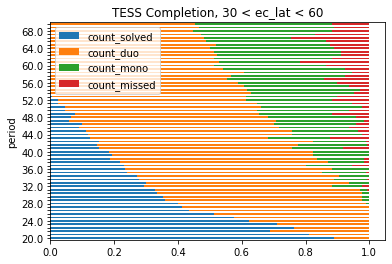

In [267]:
# make a stacked bar chart by period
# agg the data
# temptemp = temp1
temptemp = temp1[(np.abs(temp1.ec_lat) > 30) & (np.abs(temp1.ec_lat) < 60)].reset_index()
bar_df = temptemp.groupby(['period'], as_index=False).agg({
                        'count_solved': 'mean',
                        'count_duo': 'mean',
                        'count_mono': 'mean',
                        'count_missed': 'mean',})#.reset_index()#.droplevel(level=0)#.reset_index()
                        #  'd': lambda x: x.max() - x.min()})

# plot
fig, ax = plt.subplots()
fig.set_facecolor('white')
ax = bar_df.plot( 
    ax=ax,
    x = 'period', 
    kind = 'barh', 
    stacked = True, 
    title = 'TESS Completion, 30 < ec_lat < 60', 
    # mark_right = False, 
    )

# [f(x) if condition else g(x) for x in sequence]
# period_labels = [np.round(periods, 2)[i] if (i%5==0) else ('') for i in range(len(periods))]
period_labels = [p if (p%2==0) else ('') for p in np.round(bar_df.period.values, 2)]
ax.set_yticklabels(period_labels)
fig.show()

/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_79530/2510253548.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


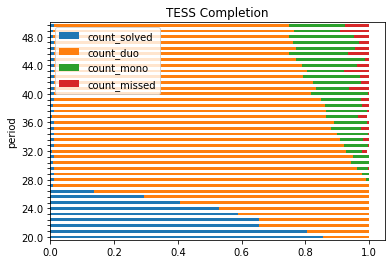

In [354]:
# make a stacked bar chart by period
# agg the data
bar_df = temp.groupby(['period'], as_index=False).agg({
                        'count_solved': 'mean',
                        'count_duo': 'mean',
                        'count_mono': 'mean',
                        'count_missed': 'mean',})#.reset_index()#.droplevel(level=0)#.reset_index()
                        #  'd': lambda x: x.max() - x.min()})

# plot
fig, ax = plt.subplots()
ax = bar_df.plot( 
    ax=ax,
    x = 'period', 
    kind = 'barh', 
    stacked = True, 
    title = 'TESS Completion', 
    # mark_right = False, 
    )

# [f(x) if condition else g(x) for x in sequence]
# period_labels = [np.round(periods, 2)[i] if (i%5==0) else ('') for i in range(len(periods))]
period_labels = [p if (p%2==0) else ('') for p in np.round(periods, 2)]
ax.set_yticklabels(period_labels)
fig.show()

/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_79530/3203343501.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


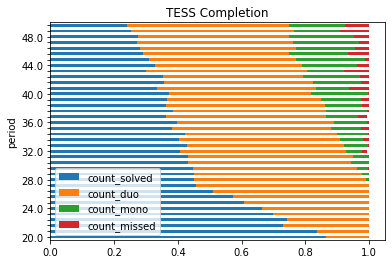

In [534]:
# make a stacked bar chart by period for second run
# agg the data
bar_df1 = temp1.groupby(['period'], as_index=False).agg({
                        'count_solved': 'mean',
                        'count_duo': 'mean',
                        'count_mono': 'mean',
                        'count_missed': 'mean',})#.reset_index()#.droplevel(level=0)#.reset_index()
                        #  'd': lambda x: x.max() - x.min()})

# plot
fig, ax = plt.subplots()
ax = bar_df1.plot( 
    ax=ax,
    x = 'period', 
    kind = 'barh', 
    stacked = True, 
    title = 'TESS Completion', 
    # mark_right = False, 
    )

# [f(x) if condition else g(x) for x in sequence]
# period_labels = [np.round(periods, 2)[i] if (i%5==0) else ('') for i in range(len(periods))]
period_labels = [p if (p%2==0) else ('') for p in np.round(periods, 2)]
ax.set_yticklabels(period_labels)
fig.show()

In [508]:
# need to figure out what's happening with the things that are getting flagged as duo transits but have no aliases
# do some plotting of individual systems.
row = rdf[(rdf.flag==2) & (rdf.num_aliases==0)].iloc[22]

row
# plt.scatter(rdf[rdf.flag==2].period, rdf[rdf.flag==2].num_aliases, alpha=.1)
# plt.yscale('log')

TIC            3.765400e+08
ec_long        8.752625e+01
ec_lat         5.092898e+01
period         2.640000e+01
tc_phase       6.000000e-01
num_aliases    0.000000e+00
flag           2.000000e+00
Name: 86, dtype: float64

**NOTE: Currently, some aliases are not getting ruled out properly and planets that should be marked as "solved" are getting marked as "duo". It appears to happen when two adjacent transits are caught in adjacent sectors. This is likely because rule_out_aliases only uses sectors with non-detections as secondary_times to rule things out. Look into a reliable way to fix this.**

In [509]:
sec = [1,3,4,5,11,12]

min_period = 1
baseline = max_consecutive_sequence(sec) * sec_cadence / 2

data = transit_times[trans_obs]
max_alias = np.min(data[1:] - data[:-1])
min_alias = max(min_period, baseline) 

min_n = np.floor(max_alias / min_alias)
# min_n = (max_alias / min_alias)
if min_n == 0:
    min_n = 1
n_a = np.arange(1, min_n + 1)

aliases = max_alias / n_a

print(max_alias, min_alias, min_n, n_a, aliases)
find_all_aliases(transit_times, sec, trans_obs, sec_obs)


744.000000001397 40.75021929473518 18.0 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.] [744.     372.     248.     186.     148.8    124.     106.2857  93.
  82.6667  74.4     67.6364  62.      57.2308  53.1429  49.6     46.5
  43.7647  41.3333]


(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18.]),
 array([744.    , 372.    , 248.    , 186.    , 148.8   , 124.    ,
        106.2857,  93.    ,  82.6667,  74.4   ,  67.6364,  62.    ,
         57.2308,  53.1429,  49.6   ,  46.5   ,  43.7647,  41.3333]))

In [446]:
aliases

array([26.4, 13.2])

In [451]:
# the times of all observed transits
data = transit_times[trans_obs]
max_alias = np.min(data[1:] - data[:-1])

print(max_alias)

print(len(sector_times), len(sec))

# exclude any aliases less than half the baseline of the longest # of consecutive sectors

26.399999999906868
9 9


In [538]:
# investigate these more, it means something is going wrong with them
# len(rdf1[(rdf1.num_aliases==1) & (rdf1.flag!=-1)])
rdf[rdf.flag==-1]
# rdf1[(rdf1.num_aliases==0)]

,TIC,ec_long,ec_lat,period,tc_phase,num_aliases,flag
1670,159670453,308.049454,-22.966761,32.0,0.0,56,-1
1730,159670453,308.049454,-22.966761,36.8,0.0,56,-1
6550,55404385,10.251542,-84.916300,27.2,0.0,2,-1
6590,55404385,10.251542,-84.916300,30.4,0.0,2,-1
6610,55404385,10.251542,-84.916300,32.0,0.0,2,-1
6670,55404385,10.251542,-84.916300,36.8,0.0,2,-1
6690,55404385,10.251542,-84.916300,38.4,0.0,2,-1
6810,55404385,10.251542,-84.916300,48.0,0.0,3,-1
6820,55404385,10.251542,-84.916300,48.8,0.0,3,-1
12690,139754153,308.613586,-32.478107,32.0,0.0,56,-1


In [419]:
sec
# >>> max([list(group) for item, group in groupby(test_list) if item == 4], key=len)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [520]:
row = rdf1[(rdf1.flag==2) & (rdf1.num_aliases==0)].iloc[22]
# row = rdf1[(rdf1.num_aliases==1) & (rdf1.flag==-1)].iloc[92]

# row
rdf1[(rdf1.flag==2) & (rdf1.num_aliases==0)]
# rdf1[(rdf1.num_aliases==1) & (rdf1.flag==-1)]

,TIC,ec_long,ec_lat,period,tc_phase,num_aliases,flag
22,376539957,87.526252,50.928985,21.6,0.2,0,2
40,376539957,87.526252,50.928985,23.2,0.0,0,2
48,376539957,87.526252,50.928985,23.2,0.8,0,2
49,376539957,87.526252,50.928985,23.2,0.9,0,2
58,376539957,87.526252,50.928985,24.0,0.8,0,2
...,...,...,...,...,...,...,...
18949,101411043,98.424628,5.825322,45.6,0.9,0,2
18951,101411043,98.424628,5.825322,46.4,0.1,0,2
18952,101411043,98.424628,5.825322,46.4,0.2,0,2
18964,101411043,98.424628,5.825322,47.2,0.4,0,2


26.400000000000006
[26.4]
[False]
[1.]
3
[26.4]


/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_79530/449271651.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


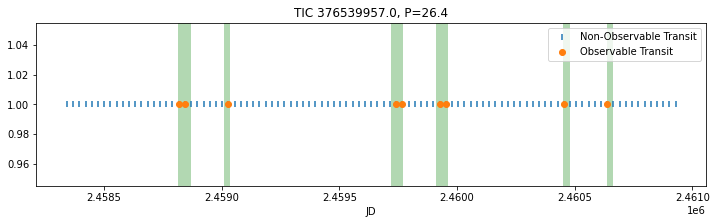

In [530]:
period = row.period
tc_phase = row.tc_phase
tic = row.TIC
sec = np.array(tdf.loc[tdf.TIC==tic, 'sec'].values[0])
sector_times = midtimes[sec-1]     # sectors are indexed from 1, midtimes from -

# calculate transit times in the relevant window
transit_times = calc_transit_times_phase(period, tc_phase, dur=2)
trans_obs, sec_obs = check_observability(transit_times, sector_times)

observed_transit = transit_times[trans_obs][0]
n_a, aliases = find_all_aliases(transit_times, sec, trans_obs, sec_obs)
# see what is ruled out by the empty sectors
# ruled_out = rule_out_aliases(aliases, observed_transit, sector_times[~sec_obs])
flag, n_a, aliases, ruled_out = analyze_aliases_and_flag(transit_times, sectors, trans_obs, sec_obs)

# print(sum(trans_obs), sum(sec_obs))
print(period)
print(aliases)
print(ruled_out)
print(n_a)
print(flag)
print(aliases[~ruled_out])

plot_transits()

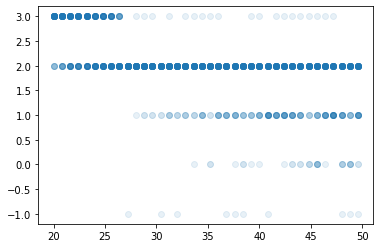

In [154]:
plt.scatter(rdf.period, rdf.flag, alpha=.1)

83.1993941811405 0.15601864044243652
Still ambiguous!


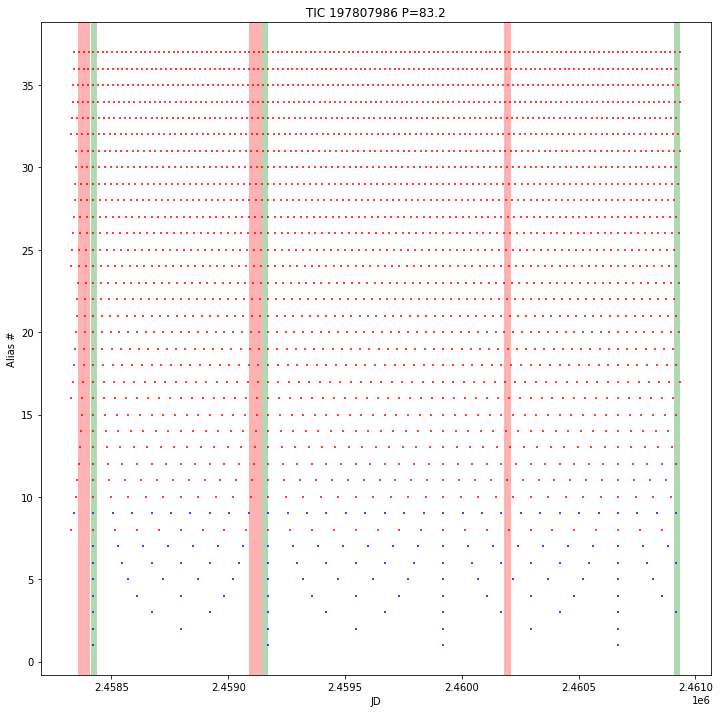

In [208]:
# get the params for that planet
j1 = 2
j2 = 0
period = periods[j1]
tc_phase = tc_phases[j2]
print(period, tc_phase)

# for that location
k = 0
tic = mini.iloc[k]['TIC']
sec = np.array(mini.iloc[k]['sec'])
sector_times = midtimes[sec-1]     # sectors are indexed from 1, midtimes from -

# calculate transit times in the relevant window
transit_times = calc_transit_times_phase(period, tc_phase, dur=2)
trans_obs, sec_obs = check_observability(transit_times, sector_times)

# find all the aliases
num_transits_observed = len(transit_times[trans_obs])

if num_transits_observed == 0:
    print("No transits captured")
    flag = 0
    plot_transits()
elif num_transits_observed == 1:
    print("Mono-transit")
    flag = 1
    plot_transits()
else:
    observed_transit = transit_times[trans_obs][0]
    n_a, aliases = find_all_aliases(transit_times, sec, trans_obs, sec_obs)

    # see what is ruled out by the empty sectors
    ruled_out = rule_out_aliases(aliases, observed_transit, sector_times[~sec_obs])
    # ruled_out = rule_out_aliases(aliases, transit_times[trans_obs][0], [2458530.256944, 2458540.256944])

    # print the status
    if np.sum(aliases[~ruled_out]) > 1 :
        print("Still ambiguous!")
        flag = 2
    elif np.sum(aliases[~ruled_out]) == 1 :
        print('Sovled!')
        flag = 3
    else:
        print("Something went wrong")
    plot_aliases()

In [154]:
def generage_flag(transit_times, trans_obs):
    """
    0 - No transits observed
    1 - Mono-transit
    2 - Duo+ transit, but unresolve aliases remaining
    3 - Solved
    """
    ...

5 55


Still ambiguous!


(0.0, 2.0)

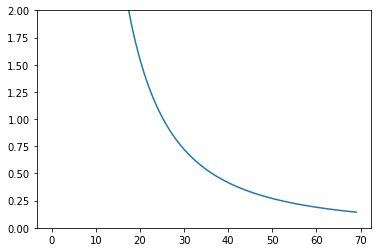

In [ ]:
plt.plot(aliases[:-1] - aliases[1:])
plt.ylim([0,2])

In [ ]:

print("Sector start times: ", sector_times)

stop_time = np.max(sector_times) + 27
transits = calc_transit_times(period, tc, stop_time=stop_time)
print("Transit times: ", transits)

observability = check_observability(transits, sector_times)
print("Observable? ", observability)
print("Observed Transits: ", transits[observability])

aliases = find_aliases(transits, observability)
print("Aliases: ", aliases)

# what happens if we add in one more sector?
new_sectors = np.array([0, 1, 7, 8, 13, 14, 15, 16]) * 27
new_stop = np.max(new_sectors) + 27
print(new_stop)
new_transits = calc_transit_times(period, tc, stop_time=new_stop)
new_obs = check_observability(new_transits, new_sectors)
new_aliases = find_aliases(new_transits, new_obs)

print('')
print("Observed Transits: ", new_transits[new_obs])
print("Observable? ", new_obs)
print("Aliases: ", new_aliases)
print('Delta N: ', (len(aliases) - len(new_aliases)) / len(aliases))

In [29]:
data = transits[observability]
max_alias = np.min(data[1:] - data[:-1])
max_alias / np.arange(1,10)

per / 10 >= n

array([50.        , 25.        , 16.66666667, 12.5       , 10.        ,
        8.33333333,  7.14285714,  6.25      ,  5.55555556])

[True, False, False, False, True, False, False, False, False, False, False]

In [ ]:
# set t = 0 to be the start date of TESS
sec_length = 28




